# Лабараторная работа №5
## Градиентный бустинг с CatBoost
**Выполнил**: 6131-010402D, Музыка Артем

### Импорт данных

In [36]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor 
from catboost import CatBoostClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.utils import shuffle
from warnings import filterwarnings
filterwarnings("ignore")

In [22]:
df = pd.read_csv('data\deaths.csv')
df

,AnalysisDate,Date Of Death Year,Date Of Death Month,Start Date,End Date,Jurisdiction of Occurrence,Sex,Race/Ethnicity,AgeGroup,AllCause,...,Alzheimer disease (G30),Influenza and pneumonia (J09-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)"
0,10/13/2021,2019,1,01/01/2019,01/31/2019,United States,F,Hispanic,0-4 years,182,...,0,4,0,1,0,22,1,0,0,0
1,10/13/2021,2019,1,01/01/2019,01/31/2019,United States,F,Hispanic,5-14 years,44,...,0,4,1,0,0,0,0,0,0,0
2,10/13/2021,2019,1,01/01/2019,01/31/2019,United States,F,Hispanic,15-24 years,122,...,0,0,2,1,2,4,6,1,0,0
3,10/13/2021,2019,1,01/01/2019,01/31/2019,United States,F,Hispanic,25-34 years,198,...,0,5,2,3,0,2,8,2,0,0
4,10/13/2021,2019,1,01/01/2019,01/31/2019,United States,F,Hispanic,35-44 years,334,...,0,11,6,4,4,5,25,10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,10/13/2021,2021,9,09/01/2021,09/30/2021,United States,Male,Other,45-54 years,179,...,1,1,0,0,2,34,18,2,70,68
3956,10/13/2021,2021,9,09/01/2021,09/30/2021,United States,Male,Other,55-64 years,237,...,0,3,8,3,2,36,40,8,55,55
3957,10/13/2021,2021,9,09/01/2021,09/30/2021,United States,Male,Other,65-74 years,263,...,3,4,8,3,4,25,60,7,55,49
3958,10/13/2021,2021,9,09/01/2021,09/30/2021,United States,Male,Other,75-84 years,203,...,5,2,6,4,4,17,37,8,36,34


### Обработка данных

Удаление ненужных колонок

In [23]:
L_del = ['AnalysisDate', 'Start Date', 'End Date']
try:
    for i in L_del:
        df.pop(i)
except:
    pass

In [25]:
def sex_replce(S):
    if S == 'Female':
        S = S.replace('emale','')
    if S == "Male":
        S = S.replace('ale','')
    return S

df['Sex'] = df['Sex'].apply(sex_replce)

In [26]:
L_object = ['Jurisdiction of Occurrence','Sex','Race/Ethnicity','AgeGroup']
for i in L_object:
    code, unique = pd.factorize(df[i])
    df[i] = code

Создание набора данных и меток классов

In [29]:
Y = df.pop('Sex')
X = df

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)


### 1. Применить классификатор ```CatBoostClassifier```
Обратите внимание, что **catboost** умеет работать с категориальными признаками (параметр ```cat_features``` - список индексов категориальных признаков), поэтому использование ```pd.factorize```/```pd.get_dummies``` здесь лишнее.
- вывести итерацию с наилучшим значением **AUC (для бинарной классификации) или наилучшим значением Logloss.
- вывести значения метрик качества классификации на тестовых данных (*accuracy* и *precision* / *recall* / *AUC*, если применимо).
- в случае бинарной классификации на основе CatBoostClassifier построить кривые **PRC** и **ROC**. Вычислить значения **PRC-AUC** и **ROC-AUC**.

In [32]:
model = CatBoostClassifier(
    iterations=100,
    loss_function='Logloss'
)
model.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [33]:
print(f"Model is fitted: {model.is_fitted()}")
print(f"Model params: {model.get_params()}")
print(f"Best iteration: {model.get_best_iteration()}")
print(f"Best score: {model.best_score_}")
print(f"Accuracy: {accuracy_score(y_test, model.predict(X_test))}")
print(f"AUC: {roc_auc_score(y_test, model.predict(X_test))}")
print(f"Precision: {precision_score(y_test, model.predict(X_test))}")
print(f"Recall: {recall_score(y_test, model.predict(X_test))}")

Model is fitted: True
Model params: {'iterations': 100, 'loss_function': 'Logloss'}
Best iteration: 99
Best score: {'learn': {'Logloss': 0.2325921021192831}, 'validation': {'Logloss': 0.2834786367588174}}
Accuracy: 0.9090909090909091
AUC: 0.9088541666666666
Precision: 0.9105263157894737
Recall: 0.9010416666666666


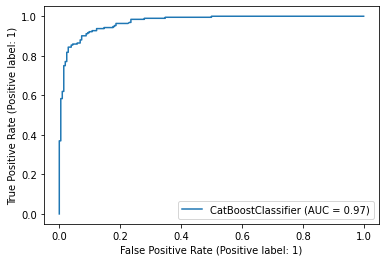

In [34]:
plot_roc_curve(model, X_test, y_test)


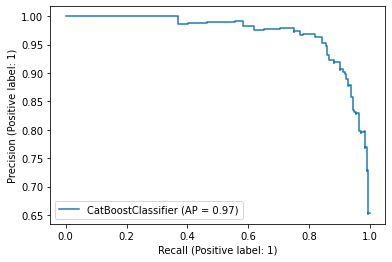

In [37]:
plot_precision_recall_curve(model, X_test, y_test, name="CatBoostClassifier")

### 2. Применить регрессию `CatBoostRegressor` к набору данных для регрессии.
Вывести номер итерации и значения метрик (**MAE** и **MSE**) для наилучшей итерации. Обратите внимание, что в задаче восстановления регрессии целевая переменная имеет непрерывные значения.

In [39]:
model_regressor = CatBoostRegressor(
    custom_metric=["MAE", "RMSE"])

model_regressor.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [40]:
print(f"Best iteration: {model_regressor.get_best_iteration()}")
print(f"Best score: {model_regressor.get_best_score()}")
print(f"Model params: {model_regressor.get_params()}")
print(f"MAE: {mean_absolute_error(y_test, model_regressor.predict(X_test))}")
print(f"MSE: {mean_squared_error(y_test, model_regressor.predict(X_test))}")

Best iteration: 977
Best score: {'learn': {'MAE': 0.10119539758151766, 'RMSE': 0.14453718070910945}, 'validation': {'MAE': 0.18556917615333826, 'RMSE': 0.2619288104031102}}
Model params: {'loss_function': 'RMSE', 'custom_metric': ['MAE', 'RMSE']}
MAE: 0.1856076218354603
MSE: 0.06860670171918841
